## 0. Importing necessary libraries,<br> Creating a folder for storing python scripts,<br> Setting up device-agnostic code

Since we're going to be creating Python scripts out of our most useful code cells, let's create a folder for storing those scripts.

We'll call the folder `TinyVGG_pytorch` and create it using Python's [`os.makedirs()`](https://docs.python.org/3/library/os.html) method.

In [1]:
import os
import torch
from torch import nn

torch.__version__

'2.0.0+cu118'

Creating a folder for python scripts

In [2]:
os.makedirs("going_modular", exist_ok=True)

Setting up device-agnostic code

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. Get data


Data might be downloaded as splitted (ready-made) or not. If not, we need to take care of it by splitting by ourself own <br>
If the image folder doesn't exist, download it as "Retinal_image_all folder" and prepare it... 

In [4]:
import os
import zipfile

from pathlib import Path
import random
import shutil
from shutil import copyfile

import requests
import pandas as pd

# Setup path to data folder
data_path = Path("../Datasets/Retinal_image_Aptos_Eyepacs_Gaussian_Filtered/")
image_path = data_path / "Retinal_image_Aptos_Eyepacs_Gaussian_Filtered_splitted" # FOLDER path = splitted dataset into Train & Test
image_path_all = data_path / "Retinal_image_Aptos_Eyepacs_Gaussian_Filtered_all" # FOLDER path = not yet splitted dataset



# # If the image folder doesn't exist, download it as "Retinal_image_all folder" and prepare it... 



# if image_path.is_dir():
#     print(f"{image_path} directory exists.")
# else:
#     print(f"Did not find {image_path} directory, creating one...")
#     image_path.mkdir(parents=True, exist_ok=True)
    
# # Download pizza, steak, sushi data
# with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
#     request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
#     print("Downloading pizza, steak, sushi data...")
#     f.write(request.content)

# # Unzip pizza, steak, sushi data
# with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
#     print("Unzipping pizza, steak, sushi data...") 
#     zip_ref.extractall(image_path)

# # Remove zip file
# os.remove(data_path / "pizza_steak_sushi.zip")

### (If necessary) Preparing the dataset into class-folders using csv info - maybe splitting isn't necessary when we have "train.csv" and "test.csv"

In [5]:
## tasks -
##          1. taking the "train" folder images into "____all" folder using train.csv with making no of folder-classes inside it

# import shutil

# csv_location = data_path / "train.csv"
# # csv_location_test = data_path / "test.csv"

# df_train_csv = pd.read_csv(csv_location)
# # df_test_csv = pd.read_csv(csv_location_test)

# class_names = df_train_csv['diagnosis'].unique()


# COMMENT IT IF MAKING DIRECTORIES && NOT COPYING----------(train)-------------------

# ## making directories according to no of classes
# for i in range(len(class_names)):
#     name = class_names[i]
#     os.makedirs(f'{image_path_all}/{name}', exist_ok=True)  




# ## taking images from train folder --> __all forder's class folder
# for i in range(len(df_train_csv)):
#     image_name = df_train_csv["id_code"][i]
#     class_name = df_train_csv["diagnosis"][i]
#     source_path = data_path / "train_images" / f"{image_name}.png"
#     destination = image_path_all/ f"{class_name}"/ f"{image_name}.png"
#     shutil.copyfile(source_path, destination)

# COMMENT IT IF NOT COPYING--------------------------------(train)-------------------




In [6]:
# no of samples per class

classes = os.listdir(image_path_all)
classes_no_of_data_dict = {}

for i in range(len(classes)):
    classes_no_of_data_dict[classes[i]] = len(os.listdir(image_path_all/classes[i]))

classes_no_of_data_dict

{'Healthy': 27615,
 'Mild_DR': 2813,
 'Moderate_DR': 6291,
 'Proliferate_DR': 1003,
 'Severe_DR': 1066}

 ### If dataset balanced or not?
 <a href="https://matplotlib.org/stable/gallery/lines_bars_and_markers/categorical_variables.html#sphx-glr-gallery-lines-bars-and-markers-categorical-variables-py
">Matplotlib documentation - plotting categorical values</a>


```Python
data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')
```

Text(0.5, 0.98, 'Categorical Plotting')

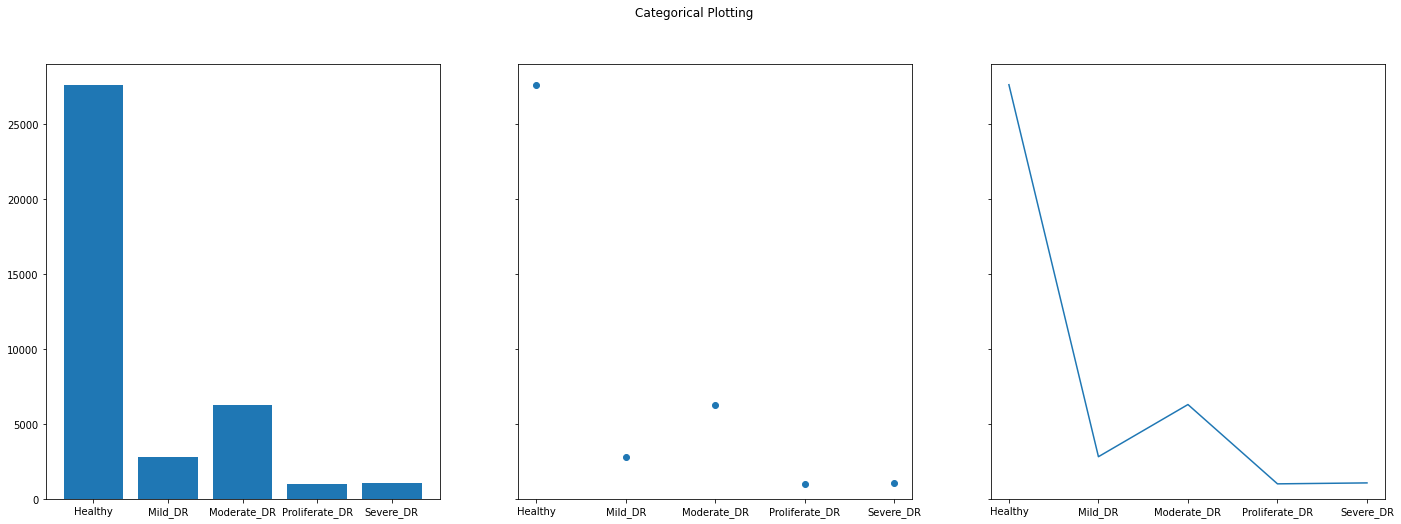

In [7]:
import matplotlib.pyplot as plt


data = classes_no_of_data_dict
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(24, 8), sharey=True)
axs[0].bar(names, values)
axs[1].scatter(names, values)
axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

### Augmentation(WIP)

In [8]:
classlist = os.listdir(image_path_all)    
filepaths = []
labels = []


for klass in classlist:
    classpath=os.path.join(image_path_all,klass)
    if os.path.isdir(classpath):
        flist=os.listdir(classpath)        
        for f in flist:
            fpath=os.path.join(classpath,f)        
            filepaths.append(fpath)
            labels.append(klass)
            
Fseries=pd.Series(filepaths, name='filepaths')
Lseries=pd.Series(labels, name='labels')    
df=pd.concat([Fseries, Lseries], axis=1)  


print (df.head())
print('df length: ', len(df))
print (df['labels'].value_counts())

                                           filepaths   labels
0  ..\Datasets\Retinal_image_Aptos_Eyepacs_Gaussi...  Healthy
1  ..\Datasets\Retinal_image_Aptos_Eyepacs_Gaussi...  Healthy
2  ..\Datasets\Retinal_image_Aptos_Eyepacs_Gaussi...  Healthy
3  ..\Datasets\Retinal_image_Aptos_Eyepacs_Gaussi...  Healthy
4  ..\Datasets\Retinal_image_Aptos_Eyepacs_Gaussi...  Healthy
df length:  38788
Healthy           27615
Moderate_DR        6291
Mild_DR            2813
Severe_DR          1066
Proliferate_DR     1003
Name: labels, dtype: int64


In [9]:
import shutil
from shutil import copyfile

working_dir = data_path

aug_dir=os.path.join(working_dir, 'aug')

if os.path.isdir(aug_dir):
    shutil.rmtree(aug_dir)
os.mkdir(aug_dir)

for label in df['labels'].unique():
    dir_path=os.path.join(aug_dir,label)    
    os.mkdir(dir_path)
    
print(os.listdir(aug_dir))

['Healthy', 'Mild_DR', 'Moderate_DR', 'Proliferate_DR', 'Severe_DR']


### Splitting

Data Description 

<ul>
    <li> 0 - No DR </li>
    <li> 1 - Mild </li>
    <li> 2 - Moderate </li>
    <li> 3 - Severe </li>
    <li> 4 - Proliferative DR </li>
<ul>

In [10]:
# # Split the dataset if not splitted into - "Retinal_image_splitted" folder

# source_path = image_path_all
# print(source_path)

# source_path_Healthy = os.path.join(source_path, 'Healthy')
# source_path_Mild_DR = os.path.join(source_path, 'Mild_DR')
# source_path_Moderate_DR = os.path.join(source_path, 'Moderate_DR')
# source_path_Proliferate_DR = os.path.join(source_path, 'Proliferate_DR')
# source_path_Severe_DR = os.path.join(source_path, 'Severe_DR')

# # Deletes all non-image files (there are two .db files bundled into the dataset)
# # !find / tmp/PetImages / -type f ! -name "*.jpg" -exec rm {} +

# # os.listdir returns a list containing all files under the given path
# print(f"There are {len(os.listdir(source_path_Healthy))} images of Healthy retinal fundus iamges.")
# print(f"There are {len(os.listdir(source_path_Mild_DR))} images of Mild DR retinal fundus iamges.")
# print(f"There are {len(os.listdir(source_path_Moderate_DR))} images of Moderate DR retinal fundus iamges.")
# print(f"There are {len(os.listdir(source_path_Proliferate_DR))} images of Proliferate DR retinal fundus iamges.")
# print(f"There are {len(os.listdir(source_path_Severe_DR))} images of Severe DR retinal fundus images.")

In [11]:
# # Define root directory
# root_dir = image_path

# # # Empty directory to prevent FileExistsError is the function is run several times
# # if os.path.exists(root_dir):
# #     shutil.rmtree(root_dir)

# # # GRADED FUNCTION: create_train_val_dirs


# def create_train_val_dirs(root_path):
#     """
#     Creates directories for the train and test sets

#     Args:
#       root_path (string) - the base directory path to create subdirectories from

#     Returns:
#       None
#     """
#     # START CODE HERE

#     # HINT:
#     # Use os.makedirs to create your directories with intermediate subdirectories
#     # Don't hardcode the paths. Use os.path.join to append the new directories to the root_path parameter

#     import os

#     training_dir = os.path.join(root_dir, "train")
#     testing_dir = os.path.join(root_dir, "test")
#     os.makedirs(training_dir)
#     os.makedirs(testing_dir)

#     training_Healthy_dir = os.path.join(training_dir, "Healthy")
#     training_Mild_DR_dir = os.path.join(training_dir, "Mild_DR")
#     training_Moderate_DR_dir = os.path.join(training_dir, "Moderate_DR")
#     training_Proliferate_DR_dir = os.path.join(training_dir, "Proliferate_DR")
#     training_Severe_DR_dir = os.path.join(training_dir, "Severe_DR")
#     os.makedirs(training_Healthy_dir)
#     os.makedirs(training_Mild_DR_dir)
#     os.makedirs(training_Moderate_DR_dir)
#     os.makedirs(training_Proliferate_DR_dir)
#     os.makedirs(training_Severe_DR_dir)

#     testing_Healthy_dir = os.path.join(testing_dir, "Healthy")
#     testing_Mild_DR_dir = os.path.join(testing_dir, "Mild_DR")
#     testing_Moderate_DR_dir = os.path.join(testing_dir, "Moderate_DR")
#     testing_Proliferate_DR_dir = os.path.join(testing_dir, "Proliferate_DR")
#     testing_Severe_DR_dir = os.path.join(testing_dir, "Severe_DR")
#     os.makedirs(testing_Healthy_dir)
#     os.makedirs(testing_Mild_DR_dir)
#     os.makedirs(testing_Moderate_DR_dir)
#     os.makedirs(testing_Proliferate_DR_dir)
#     os.makedirs(testing_Severe_DR_dir)

#     return training_dir, testing_dir, training_Healthy_dir, training_Mild_DR_dir, training_Moderate_DR_dir, training_Proliferate_DR_dir, training_Severe_DR_dir, testing_Healthy_dir, testing_Mild_DR_dir, testing_Moderate_DR_dir, testing_Proliferate_DR_dir, testing_Severe_DR_dir
#     # END CODE HERE


# try:
#     training_dir, testing_dir, training_Healthy_dir, training_Mild_DR_dir, training_Moderate_DR_dir, training_Proliferate_DR_dir, training_Severe_DR_dir, testing_Healthy_dir, testing_Mild_DR_dir, testing_Moderate_DR_dir, testing_Proliferate_DR_dir, testing_Severe_DR_dir = create_train_val_dirs(root_path=root_dir)
# except FileExistsError:
#     print("You should not be seeing this since the upper directory is removed beforehand")


In [12]:
# # Test your create_train_val_dirs function

# for rootdir, dirs, files in os.walk(root_dir):
#     for subdir in dirs:
#         print(os.path.join(rootdir, subdir))

In [13]:
# # GRADED FUNCTION: split_data
# def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
#     """
#     Splits the data into train and test sets

#     Args:
#       SOURCE_DIR (string): directory path containing the images
#       TRAINING_DIR (string): directory path to be used for training
#       VALIDATION_DIR (string): directory path to be used for validation
#       SPLIT_SIZE (float): proportion of the dataset to be used for training

#     Returns:
#       None
#     """

#     # START CODE HERE

#     contents_source_dir = os.listdir(SOURCE_DIR)
#     contents_source_dir = random.sample(contents_source_dir, len(contents_source_dir))

#     training_number = int(len(contents_source_dir) * SPLIT_SIZE)
#     target_dir = TRAINING_DIR

#     for index in range(len(contents_source_dir)):
#         if os.path.getsize(os.path.join(SOURCE_DIR, contents_source_dir[index])) == 0:
#             print(f"{contents_source_dir[index]} is zero length, so ignoring.")
#         else:
#             copyfile(os.path.join(SOURCE_DIR, contents_source_dir[index]), os.path.join(target_dir, contents_source_dir[index]))

#         if index == training_number:
#             target_dir = VALIDATION_DIR

#     # END CODE HERE


In [14]:
# # Empty directories in case you run this cell multiple times
# if len(os.listdir(training_Healthy_dir)) > 0:
#     for file in os.scandir(training_Healthy_dir):
#         os.remove(file.path)

# if len(os.listdir(training_Mild_DR_dir)) > 0:
#     for file in os.scandir(training_Mild_DR_dir):
#         os.remove(file.path)

# if len(os.listdir(training_Moderate_DR_dir)) > 0:
#     for file in os.scandir(training_Moderate_DR_dir):
#         os.remove(file.path)

# if len(os.listdir(training_Proliferate_DR_dir)) > 0:
#     for file in os.scandir(training_Proliferate_DR_dir):
#         os.remove(file.path)

# if len(os.listdir(training_Severe_DR_dir)) > 0:
#     for file in os.scandir(training_Severe_DR_dir):
#         os.remove(file.path)




# if len(os.listdir(testing_Healthy_dir)) > 0:
#     for file in os.scandir(testing_Healthy_dir):
#         os.remove(file.path)

# if len(os.listdir(testing_Mild_DR_dir)) > 0:
#     for file in os.scandir(testing_Mild_DR_dir):
#         os.remove(file.path)

# if len(os.listdir(testing_Moderate_DR_dir)) > 0:
#     for file in os.scandir(testing_Moderate_DR_dir):
#         os.remove(file.path)

# if len(os.listdir(testing_Proliferate_DR_dir)) > 0:
#     for file in os.scandir(testing_Proliferate_DR_dir):
#         os.remove(file.path)

# if len(os.listdir(testing_Severe_DR_dir)) > 0:
#     for file in os.scandir(testing_Severe_DR_dir):
#         os.remove(file.path)

# # Define proportion of images used for training
# split_size = .8

# # Run the function
# # NOTE: Messages about zero length images should be printed out
# split_data(source_path_Healthy, training_Healthy_dir, testing_Healthy_dir, split_size)
# split_data(source_path_Mild_DR, training_Mild_DR_dir, testing_Mild_DR_dir, split_size)
# split_data(source_path_Moderate_DR, training_Moderate_DR_dir, testing_Moderate_DR_dir, split_size)
# split_data(source_path_Proliferate_DR, training_Proliferate_DR_dir, testing_Proliferate_DR_dir, split_size)
# split_data(source_path_Severe_DR, training_Severe_DR_dir, testing_Severe_DR_dir, split_size)

# # Check that the number of images matches the expected output

# # Your function should perform copies rather than moving images so original directories should contain unchanged images
# print(f"\n\nOriginal Healthy directory has {len(os.listdir(source_path_Healthy))} images")
# print(f"Original Mild DR directory has {len(os.listdir(source_path_Mild_DR))} images")
# print(f"Original Moderate DR directory has {len(os.listdir(source_path_Moderate_DR))} images")
# print(f"Original Proliferate DR directory has {len(os.listdir(source_path_Proliferate_DR))} images")
# print(f"Original Severe DR directory has {len(os.listdir(source_path_Severe_DR))} images\n")

# # Training and validation splits
# print(f"There are {len(os.listdir(training_Healthy_dir))} images of Healthy for training")
# print(f"There are {len(os.listdir(training_Mild_DR_dir))} images of Mild DR for training")
# print(f"There are {len(os.listdir(training_Moderate_DR_dir))} images of Moderate DR for training")
# print(f"There are {len(os.listdir(training_Proliferate_DR_dir))} images of Proliferate DR for training")
# print(f"There are {len(os.listdir(training_Severe_DR_dir))} images of Severe for training\n\n")

# print(f"There are {len(os.listdir(testing_Healthy_dir))} images of Healthy for Validation")
# print(f"There are {len(os.listdir(testing_Mild_DR_dir))} images of Mild DR for Validation")
# print(f"There are {len(os.listdir(testing_Moderate_DR_dir))} images of Moderate DR for Validation")
# print(f"There are {len(os.listdir(testing_Proliferate_DR_dir))} images of Proliferate DR for Validation")
# print(f"There are {len(os.listdir(testing_Severe_DR_dir))} images of Severe for Validation")

##### Splitting process ends here.....................

In [15]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('../Datasets/Retinal_image_Aptos_Eyepacs_Gaussian_Filtered/Retinal_image_Aptos_Eyepacs_Gaussian_Filtered_splitted/train'),
 WindowsPath('../Datasets/Retinal_image_Aptos_Eyepacs_Gaussian_Filtered/Retinal_image_Aptos_Eyepacs_Gaussian_Filtered_splitted/test'))

## 2. Create Datasets and DataLoaders

Let's turn our data into PyTorch `Dataset`'s and `DataLoader`'s and find out a few useful attributes from them such as `classes` and their lengths. 

In [16]:
from torchvision import datasets, transforms

# Create image size (from Table 3 in the ViT paper) 
IMG_SIZE = 224
# IMG_SIZE = 64

# Create transform pipeline manually
data_transform = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
])           
print(f"Manually created transforms: {data_transform}")


# Use ImageFolder to create dataset(s)
train_data = datasets.ImageFolder(root=train_dir, # target folder of images
                                  transform=data_transform, # transforms to perform on data (images)
                                  target_transform=None) # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root=test_dir, 
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)
Train data:
Dataset ImageFolder
    Number of datapoints: 31033
    Root location: ..\Datasets\Retinal_image_Aptos_Eyepacs_Gaussian_Filtered\Retinal_image_Aptos_Eyepacs_Gaussian_Filtered_splitted\train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 7755
    Root location: ..\Datasets\Retinal_image_Aptos_Eyepacs_Gaussian_Filtered\Retinal_image_Aptos_Eyepacs_Gaussian_Filtered_splitted\test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()

In [17]:
# Get class names as a list
class_names = train_data.classes
class_names

['Healthy', 'Mild_DR', 'Moderate_DR', 'Proliferate_DR', 'Severe_DR']

In [18]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'Healthy': 0,
 'Mild_DR': 1,
 'Moderate_DR': 2,
 'Proliferate_DR': 3,
 'Severe_DR': 4}

In [19]:
# Check the lengths
len(train_data), len(test_data)

(31033, 7755)

In [20]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
# from torchsampler import ImbalancedDatasetSampler

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=BATCH_SIZE, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True,
                              # sampler=ImbalancedDatasetSampler(train_data)
                              ) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=BATCH_SIZE, 
                             num_workers=1, 
                             shuffle=False,
                            #  shuffle=True,
                            #  sampler=ImbalancedDatasetSampler(test_data)
                             ) # don't usually need to shuffle testing data

len(train_dataloader), len(test_dataloader)

(970, 243)

In [21]:
# Check out single image size/shape
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 224, 224]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


In [22]:
# Get a batch of images
image_batch, label_batch = next(iter(train_dataloader))

# Get a single image from the batch
image, label = image_batch[0], label_batch[0]

# View the batch shapes
image.shape, label

(torch.Size([3, 224, 224]), tensor(0))

### From github

In [23]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import Sequential as Seq
from gcn_lib import Grapher, act_layer

from timm.data import IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD
from timm.models.helpers import load_pretrained
from timm.models.layers import DropPath, to_2tuple, trunc_normal_
from timm.models.registry import register_model

In [24]:
class Stem(nn.Module):
    """ Image to Visual Word Embedding
    Overlap: https://arxiv.org/pdf/2106.13797.pdf
    """
    def __init__(self, img_size=224, in_dim=3, out_dim=768, act='relu'):
        super().__init__()
        self.convs = nn.Sequential(
            nn.Conv2d(in_dim, out_dim//8, 3, stride=2, padding=1),
            nn.BatchNorm2d(out_dim//8),
            act_layer(act),
            nn.Conv2d(out_dim//8, out_dim//4, 3, stride=2, padding=1),
            nn.BatchNorm2d(out_dim//4),
            act_layer(act),
            nn.Conv2d(out_dim//4, out_dim//2, 3, stride=2, padding=1),
            nn.BatchNorm2d(out_dim//2),
            act_layer(act),
            nn.Conv2d(out_dim//2, out_dim, 3, stride=2, padding=1),
            nn.BatchNorm2d(out_dim),
            act_layer(act),
            nn.Conv2d(out_dim, out_dim, 3, stride=1, padding=1),
            nn.BatchNorm2d(out_dim),
        )

    def forward(self, x):
        x = self.convs(x)
        return x

In [25]:
from going_modular.helper_functions import download_data, set_seeds, plot_loss_curves

# set_seeds()

# # Create an instance of patch embedding layer
# patchify = Stem(img_size=224, in_dim=3, out_dim=768, act='relu')

# # Pass a single image through
# print(f"Input image shape: {image.unsqueeze(0).shape}")
# patch_embedded_image = patchify(image.unsqueeze(0)) # add an extra batch dimension on the 0th index, otherwise will error
# print(f"Output patch embedding shape: {patch_embedded_image.shape}")

In [26]:
class FFN(nn.Module):
    def __init__(self, in_features, hidden_features=None, out_features=None, act='relu', drop_path=0.0):
        super().__init__()
        out_features = out_features or in_features
        hidden_features = hidden_features or in_features
        self.fc1 = nn.Sequential(
            nn.Conv2d(in_features, hidden_features, 1, stride=1, padding=0),
            nn.BatchNorm2d(hidden_features),
        )
        self.act = act_layer(act)
        self.fc2 = nn.Sequential(
            nn.Conv2d(hidden_features, out_features, 1, stride=1, padding=0),
            nn.BatchNorm2d(out_features),
        )
        self.drop_path = DropPath(drop_path) if drop_path > 0. else nn.Identity()

    def forward(self, x):
        shortcut = x
        x = self.fc1(x)
        x = self.act(x)
        x = self.fc2(x)
        x = self.drop_path(x) + shortcut
        return x

In [27]:
class DeepGCN(torch.nn.Module):
    def __init__(self, opt):
        super(DeepGCN, self).__init__()
        channels = opt.n_filters
        k = opt.k
        act = opt.act
        norm = opt.norm
        bias = opt.bias
        epsilon = opt.epsilon
        stochastic = opt.use_stochastic
        conv = opt.conv
        self.n_blocks = opt.n_blocks
        drop_path = opt.drop_path
        
        self.stem = Stem(out_dim=channels, act=act)

        dpr = [x.item() for x in torch.linspace(0, drop_path, self.n_blocks)]  # stochastic depth decay rule 
        print('dpr', dpr)
        num_knn = [int(x.item()) for x in torch.linspace(k, 2*k, self.n_blocks)]  # number of knn's k
        print('num_knn', num_knn)
        max_dilation = 196 // max(num_knn)
        
        self.pos_embed = nn.Parameter(torch.zeros(1, channels, 14, 14))

        if opt.use_dilation:   ## true 
            self.backbone = Seq(*[Seq(Grapher(channels, num_knn[i], min(i // 4 + 1, max_dilation), conv, act, norm,
                                                bias, stochastic, epsilon, 1, drop_path=dpr[i]),
                                      FFN(channels, channels * 4, act=act, drop_path=dpr[i])
                                     ) for i in range(self.n_blocks)])
        else: ## false
            self.backbone = Seq(*[Seq(Grapher(channels, num_knn[i], 1, conv, act, norm,
                                                bias, stochastic, epsilon, 1, drop_path=dpr[i]),
                                      FFN(channels, channels * 4, act=act, drop_path=dpr[i])
                                     ) for i in range(self.n_blocks)])
        ## elif:----------------------------
        self.prediction = Seq(nn.Conv2d(channels, 1024, 1, bias=True),
                              nn.BatchNorm2d(1024),
                              act_layer(act),
                              nn.Dropout(opt.dropout),
                              nn.Conv2d(1024, opt.n_classes, 1, bias=True))
        self.model_init()

    def model_init(self):
        for m in self.modules():
            if isinstance(m, torch.nn.Conv2d):
                torch.nn.init.kaiming_normal_(m.weight)
                m.weight.requires_grad = True
                if m.bias is not None:
                    m.bias.data.zero_()
                    m.bias.requires_grad = True

    def forward(self, inputs):
        # print((self.stem(inputs).shape))
        # print((self.pos_embed).shape)
        x = self.stem(inputs) + self.pos_embed
        B, C, H, W = x.shape
        
        for i in range(self.n_blocks):
            x = self.backbone[i](x)

        x = F.adaptive_avg_pool2d(x, 1)
        return self.prediction(x).squeeze(-1).squeeze(-1)

In [28]:
def _cfg(url='', **kwargs):
    return {
        'url': url,
        'num_classes': 5, 'input_size': (3, 224, 224), 'pool_size': None,
        'crop_pct': .9, 
        'interpolation': 'bicubic',
        'mean': IMAGENET_DEFAULT_MEAN, 'std': IMAGENET_DEFAULT_STD,
        'first_conv': 'patch_embed.proj', 'classifier': 'head',
        **kwargs
    }


default_cfgs = {
    'gnn_patch16_224': _cfg(
        crop_pct=0.9,
        input_size=(3, 224, 224),
        mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5),
        # mean=(0.485, 0.456, 0.406), std = (0.229, 0.224, 0.225)
    ),
}



def vig_ti_224_gelu(pretrained=False, **kwargs):
    class OptInit:
        def __init__(self, num_classes=5, drop_path_rate=0.0, drop_rate=0.0, num_knn=9, **kwargs):
            self.k = num_knn # neighbor num (default:9)
            self.conv = 'mr' # graph conv layer {edge, mr}
            self.act = 'gelu' # activation layer {relu, prelu, leakyrelu, gelu, hswish}
            self.norm = 'batch' # batch or instance normalization {batch, instance}
            self.bias = True # bias of conv layer True or False
            self.n_blocks = 12 # number of basic blocks in the backbone
            self.n_filters = 192 # number of channels of deep features
            self.n_classes = num_classes # Dimension of out_channels
            self.dropout = drop_rate # dropout rate
            self.use_dilation = True # use dilated knn or not
            self.epsilon = 0.2 # stochastic epsilon for gcn
            self.use_stochastic = False # stochastic for gcn, True or False
            self.drop_path = drop_path_rate

    opt = OptInit(**kwargs)
    model = DeepGCN(opt)
    model.default_cfg = default_cfgs['gnn_patch16_224']
    return model


def vig_s_224_gelu(pretrained=False, **kwargs):
    class OptInit:
        def __init__(self, num_classes=5, drop_path_rate=0.0, drop_rate=0.0, num_knn=9, **kwargs):
            self.k = num_knn # neighbor num (default:9)
            self.conv = 'mr' # graph conv layer {edge, mr}
            self.act = 'gelu' # activation layer {relu, prelu, leakyrelu, gelu, hswish}
            self.norm = 'batch' # batch or instance normalization {batch, instance}
            self.bias = True # bias of conv layer True or False
            self.n_blocks = 16 # number of basic blocks in the backbone
            self.n_filters = 320 # number of channels of deep features
            self.n_classes = num_classes # Dimension of out_channels
            self.dropout = drop_rate # dropout rate
            self.use_dilation = True # use dilated knn or not
            self.epsilon = 0.2 # stochastic epsilon for gcn
            self.use_stochastic = False # stochastic for gcn, True or False
            self.drop_path = drop_path_rate

    opt = OptInit(**kwargs)
    model = DeepGCN(opt)
    model.default_cfg = default_cfgs['gnn_patch16_224']
    return model


def vig_b_224_gelu(pretrained=False, **kwargs):
    class OptInit:
        def __init__(self, num_classes=5, drop_path_rate=0.0, drop_rate=0.0, num_knn=9, **kwargs):
            self.k = num_knn # neighbor num (default:9)
            self.conv = 'mr' # graph conv layer {edge, mr}
            self.act = 'gelu' # activation layer {relu, prelu, leakyrelu, gelu, hswish}
            self.norm = 'batch' # batch or instance normalization {batch, instance}
            self.bias = True # bias of conv layer True or False
            self.n_blocks = 16 # number of basic blocks in the backbone
            self.n_filters = 640 # number of channels of deep features
            self.n_classes = num_classes # Dimension of out_channels
            self.dropout = drop_rate # dropout rate
            self.use_dilation = True # use dilated knn or not
            self.epsilon = 0.2 # stochastic epsilon for gcn
            self.use_stochastic = False # stochastic for gcn, True or False
            self.drop_path = drop_path_rate

    opt = OptInit(**kwargs)
    model = DeepGCN(opt)
    model.default_cfg = default_cfgs['gnn_patch16_224']
    return model

In [29]:
model = vig_ti_224_gelu().to(device)
# model

dpr [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
num_knn [9, 9, 10, 11, 12, 13, 13, 14, 15, 16, 17, 18]


In [30]:
from torchinfo import summary

# Create an instance of TransformerEncoderBlock
model_summary = model

# Print an input and output summary of our Transformer Encoder (uncomment for full output)
summary(model=model_summary,
        input_size=(32, 3, 224, 224), # (batch_size, num_patches, embedding_dimension)
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

d:\Python310\lib\site-packages\torchinfo\torchinfo.py:477: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  action_fn=lambda data: sys.getsizeof(data.storage()),
d:\Python310\lib\site-packages\torch\storage.py:665: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return super().__sizeof__() + self.nbytes()


Layer (type (var_name))                                                Input Shape          Output Shape         Param #              Trainable
DeepGCN (DeepGCN)                                                      [32, 3, 224, 224]    [32, 5]              37,632               True
├─Stem (stem)                                                          [32, 3, 224, 224]    [32, 192, 14, 14]    --                   True
│    └─Sequential (convs)                                              [32, 3, 224, 224]    [32, 192, 14, 14]    --                   True
│    │    └─Conv2d (0)                                                 [32, 3, 224, 224]    [32, 24, 112, 112]   672                  True
│    │    └─BatchNorm2d (1)                                            [32, 24, 112, 112]   [32, 24, 112, 112]   48                   True
│    │    └─GELU (2)                                                   [32, 24, 112, 112]   [32, 24, 112, 112]   --                   --
│    │    └─Conv2d (3)  

In [31]:
import wandb

# start a new wandb run to track this script
tracking = wandb.init(
    # set the wandb project where this run will be logged
    project="ViG_pytorch",
    name="ViG_ti_224_gelu : Dataset - Train19 + Train15 Gaussian Filtered",
    notes="",
    # track hyperparameters and run metadata
    config={
        "learning_rate": 2e-3,
        "architecture": "ViG_ti_224_gelu",
        "dataset": "Merged ",
        "epochs": 30,
    }
)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: shkiam33. Use `wandb login --relogin` to force relogin


In [32]:
from going_modular import engine

# Setup the optimizer to optimize our ViT model parameters using hyperparameters from the ViT paper 
optimizer = torch.optim.AdamW(params=model.parameters(), 
                              lr=2e-3, # Base LR from Table 3 for ViT-* ImageNet-1k
                            #   lr = 0.001
                              betas=(0.9, 0.999), # default values but also mentioned in ViT paper section 4.1 (Training & Fine-tuning)
                              weight_decay=0.05
                              ) # from the ViT paper section 4.1 (Training & Fine-tuning) and Table 3 for ViT-* ImageNet-1k

# Setup the loss function for multi-class classification
loss_fn = torch.nn.CrossEntropyLoss()

# Set the seeds
set_seeds()

# Train the model and save the training results to a dictionary
results, y_true_train_data, y_predicted_train_data, y_true_test_data, y_predicted_test_data = engine.train(model=model,
                                                                                                                 train_dataloader=train_dataloader,
                                                                                                                 test_dataloader=test_dataloader,
                                                                                                                 optimizer=optimizer,
                                                                                                                 loss_fn=loss_fn,
                                                                                                                 epochs=20,
                                                                                                                 device=device,
                                                                                                                 tracking=tracking)

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9397 | train_acc: 0.7109 | test_loss: 0.8816 | test_acc: 0.7136
Epoch: 2 | train_loss: 0.8477 | train_acc: 0.7258 | test_loss: 0.8190 | test_acc: 0.7310
Epoch: 3 | train_loss: 0.8224 | train_acc: 0.7300 | test_loss: 0.8180 | test_acc: 0.7314
Epoch: 4 | train_loss: 0.7935 | train_acc: 0.7364 | test_loss: 0.8275 | test_acc: 0.7383
Epoch: 5 | train_loss: 0.7654 | train_acc: 0.7441 | test_loss: 0.8023 | test_acc: 0.7404
Epoch: 6 | train_loss: 0.7483 | train_acc: 0.7486 | test_loss: 0.7600 | test_acc: 0.7393
Epoch: 7 | train_loss: 0.7310 | train_acc: 0.7513 | test_loss: 0.7767 | test_acc: 0.7460


In [ ]:
# import gc
# torch.cuda.empty_cache()
# gc.collect()

### Evaluations

In [ ]:
# taking "y_predicted_train_data" & "y_true_train_data" into 1D array because it came out as batch by batch 2D list
predicted_train_data_1D = []
true_train_data_1D = []

for i in range(len(y_predicted_train_data)):
    for j in range(len(y_predicted_train_data[i])):
        predicted_train_data_1D.append(y_predicted_train_data[i][j])
        true_train_data_1D.append(y_true_train_data[i][j])

# taking both into CPU
predicted_train_data_cpu = torch.tensor(predicted_train_data_1D, device = 'cpu')
true_train_data_cpu = torch.tensor(true_train_data_1D, device = 'cpu')



# now same procedure for test data's
predicted_test_data_1D = []
true_test_data_1D = []

for i in range(len(y_predicted_test_data)):
    for j in range(len(y_predicted_test_data[i])):
        predicted_test_data_1D.append(y_predicted_test_data[i][j])
        true_test_data_1D.append(y_true_test_data[i][j])

# taking both into CPU
predicted_test_data_cpu = torch.tensor(predicted_test_data_1D, device = 'cpu')
true_test_data_cpu = torch.tensor(true_test_data_1D, device = 'cpu')

In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report

y_true = true_train_data_cpu
y_pred = predicted_train_data_cpu

report = classification_report(y_true, y_pred, target_names=class_names)

print(f"Evaluation report on Train data: \n\n{report}\n\n\n\n")



y_true = true_test_data_cpu
y_pred = predicted_test_data_cpu

report = classification_report(y_true, y_pred, target_names=class_names)

print(f"Evaluation report on Test data: \n\n{report}")

Evaluation report on Train data: 

                precision    recall  f1-score   support

       Healthy       1.00      0.99      1.00      1445
       Mild_DR       0.94      0.97      0.96       297
   Moderate_DR       0.98      0.97      0.98       800
Proliferate_DR       0.94      0.94      0.94       237
     Severe_DR       0.92      0.93      0.93       155

      accuracy                           0.98      2934
     macro avg       0.96      0.96      0.96      2934
  weighted avg       0.98      0.98      0.98      2934





Evaluation report on Test data: 

                precision    recall  f1-score   support

       Healthy       0.97      0.84      0.90       360
       Mild_DR       0.00      0.00      0.00        73
   Moderate_DR       0.50      0.89      0.64       199
Proliferate_DR       0.44      0.07      0.12        58
     Severe_DR       0.14      0.18      0.16        38

      accuracy                           0.68       728
     macro avg       0.41 

d:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from torchmetrics.classification import MulticlassCohenKappa
target = y_true
preds = y_pred
metric = MulticlassCohenKappa(num_classes=5)
metric(preds, target)

tensor(0.5004)

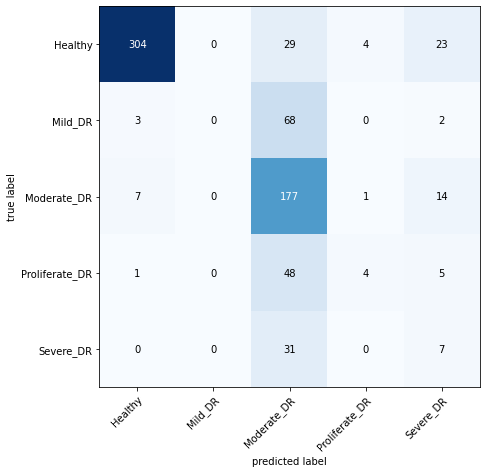

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred,
                         target=y_true)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

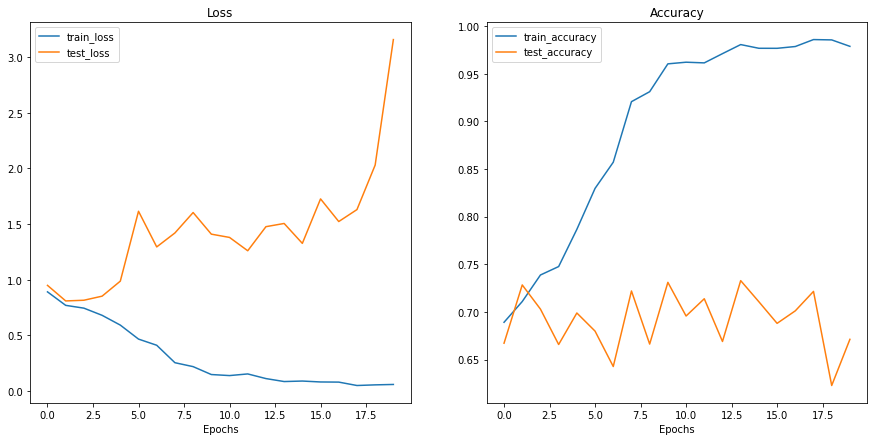

In [ ]:
# Get the plot_loss_curves() function from helper_functions.py, download the file if we don't have it
try:
    from going_modular.helper_functions import plot_loss_curves
except:
    print("[INFO] Couldn't find helper_functions.py, downloading...")
    # with open("helper_functions.py", "wb") as f:
    #     import requests
    #     request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    #     f.write(request.content)
    # from helper_functions import plot_loss_curves

# Plot the loss curves of our model
plot_loss_curves(results)